In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install matplotlib

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
reddit_data = pd.read_csv('Reddit_Data.csv')
twitter_data = pd.read_csv('Twitter_Data.csv')

In [7]:
reddit_data

clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37249 rows x 2 columns]

In [8]:
twitter_data

clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]

In [9]:
reddit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [10]:

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [11]:
twitter_data.columns=['messages','labels']
reddit_data.columns=['messages','labels']

In [12]:
twitter_data.head()

messages  labels
0  when modi promised “minimum government maximum...    -1.0
1  talk all the nonsense and continue all the dra...     0.0
2  what did just say vote for modi  welcome bjp t...     1.0
3  asking his supporters prefix chowkidar their n...     1.0
4  answer who among these the most powerful world...     1.0

In [13]:
reddit_data.head()

messages  labels
0   family mormon have never tried explain them t...       1
1  buddhism has very much lot compatible with chr...       1
2  seriously don say thing first all they won get...      -1
3  what you have learned yours and only yours wha...       0
4  for your own benefit you may want read living ...       1

In [14]:

data = pd.concat([twitter_data, reddit_data], ignore_index = True)
data

data.isnull().sum()

messages    104
labels        7
dtype: int64

In [15]:

data = data.dropna()

In [16]:

data.head()

messages  labels
0  when modi promised “minimum government maximum...    -1.0
1  talk all the nonsense and continue all the dra...     0.0
2  what did just say vote for modi  welcome bjp t...     1.0
3  asking his supporters prefix chowkidar their n...     1.0
4  answer who among these the most powerful world...     1.0

In [17]:
pip install nltk

In [18]:
import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [19]:
#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords 
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

<>:5: SyntaxWarning: invalid escape sequence '\/'
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\/'
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\w'
C:\Users\richa\AppData\Local\Temp\ipykernel_7976\3424685951.py:5: SyntaxWarning: invalid escape sequence '\/'
  return re.sub('https?:\/\/\S*|www\.\S+','URL',text)
C:\Users\richa\AppData\Local\Temp\ipykernel_7976\3424685951.py:13: SyntaxWarning: invalid escape sequence '\S'
  return re.sub('@\S*','user',text,flags=re.IGNORECASE)
C:\Users\richa\AppData\Local\Temp\ipykernel_7976\3424685951.py:17: SyntaxWarning: invalid escape sequence '\d'
  return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)
C:\Users\richa\AppData\Local\Temp\ipykernel_7976\3424685951.py:25: SyntaxWarning: i

In [20]:
def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    #text=stemming(text)
    text=lemmatization(text)
    return text


In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
data['messages1']=data['messages'].apply(clean_text)

In [23]:
data['messages1']

0         modi promise “minimum government maximum gover...
1                    talk nonsense continue drama vote modi
2         say vote modi welcome bjp tell rahul main camp...
3         ask supporters prefix chowkidar name modi grea...
4         answer among powerful world leader today trump...
                                ...                        
200224                                                jesus
200225    kya bhai pure saal chutiya banaya modi aur jab...
200226                 downvote karna tha par upvote hogaya
200227                                            haha nice
200228                              facebook work bjp’ cell
Name: messages1, Length: 200118, dtype: object

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Extract compound score, which represents overall sentiment
    compound_score = scores['compound']
    # Return compound score
    return compound_score

# Apply sentiment analysis to the cleaned text data
data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   messages         200118 non-null  object 
 1   labels           200118 non-null  float64
 2   messages1        200118 non-null  object 
 3   sentiment_score  200118 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.6+ MB


In [27]:

data.drop('messages', axis=1, inplace=True)

In [28]:
data.head()

labels                                          messages1  sentiment_score
0    -1.0  modi promise “minimum government maximum gover...           0.4939
1     0.0             talk nonsense continue drama vote modi          -0.4019
2     1.0  say vote modi welcome bjp tell rahul main camp...           0.7096
3     1.0  ask supporters prefix chowkidar name modi grea...           0.4939
4     1.0  answer among powerful world leader today trump...           0.4215

<Axes: xlabel='labels'>

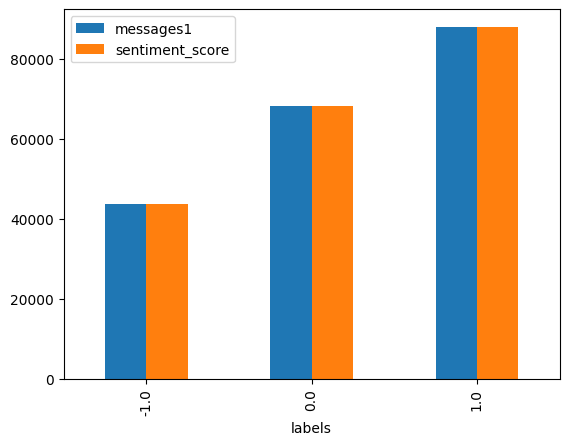

In [29]:
# The distribution of sentiments
data.groupby('labels').count().plot(kind='bar')

In [30]:
data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

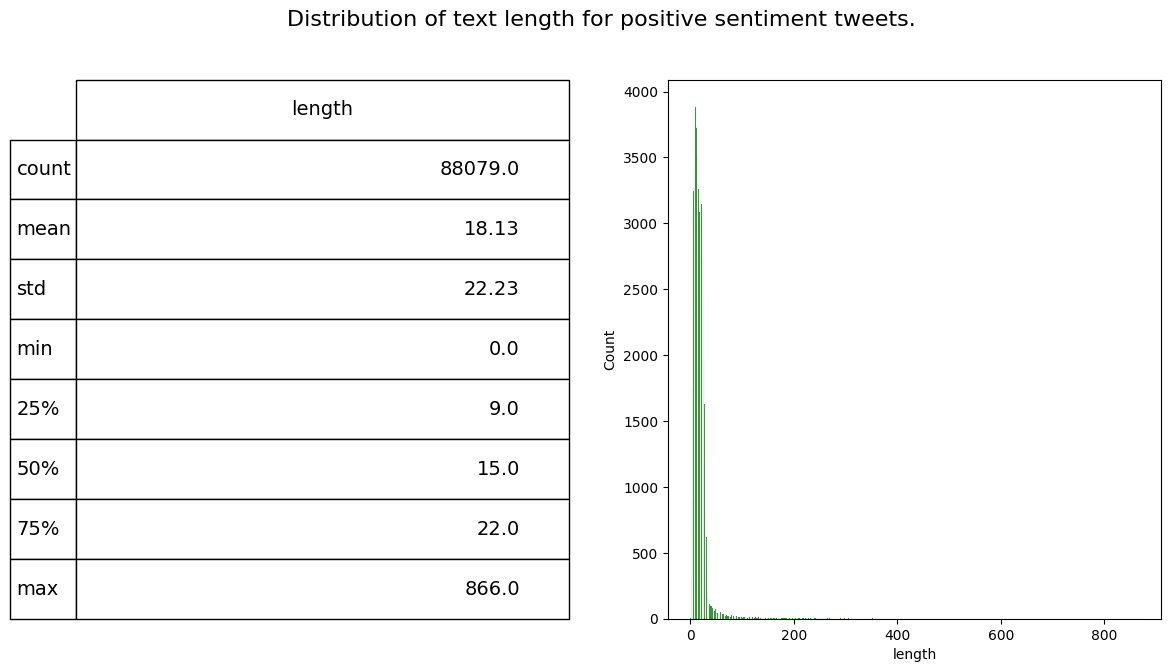

In [31]:
#Plotting the distribution of text length for positive sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

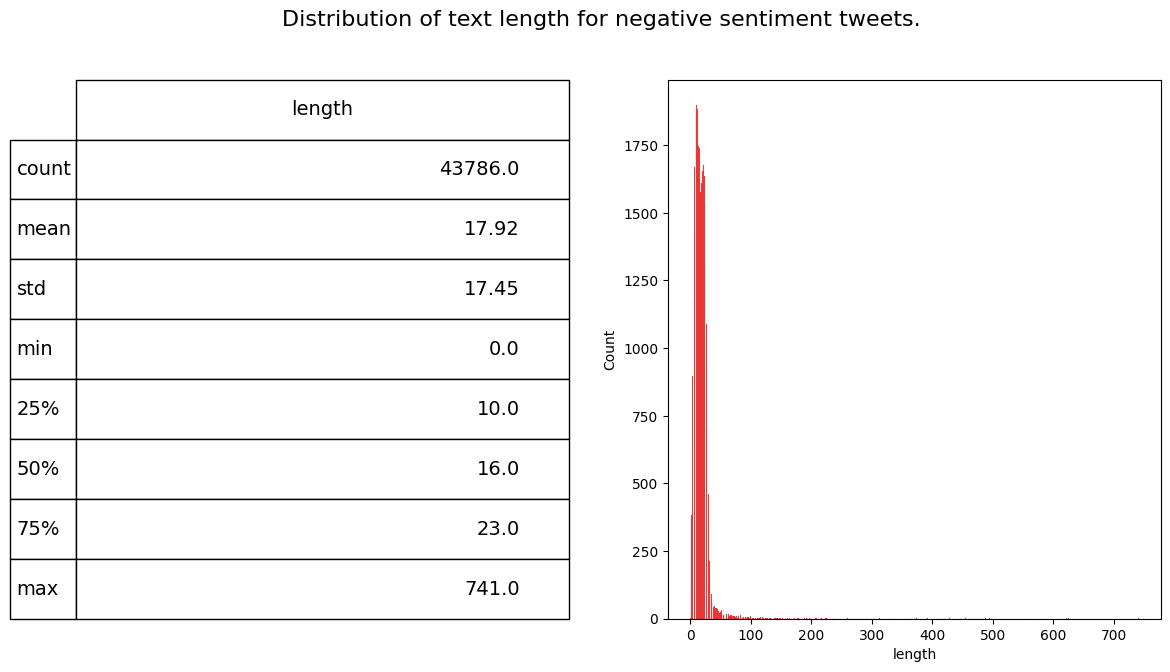

In [32]:
#Plotting the distribution of text length for Negative sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Negative']['length'], ax=ax1,color='red')
describe = data.length[data.label=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

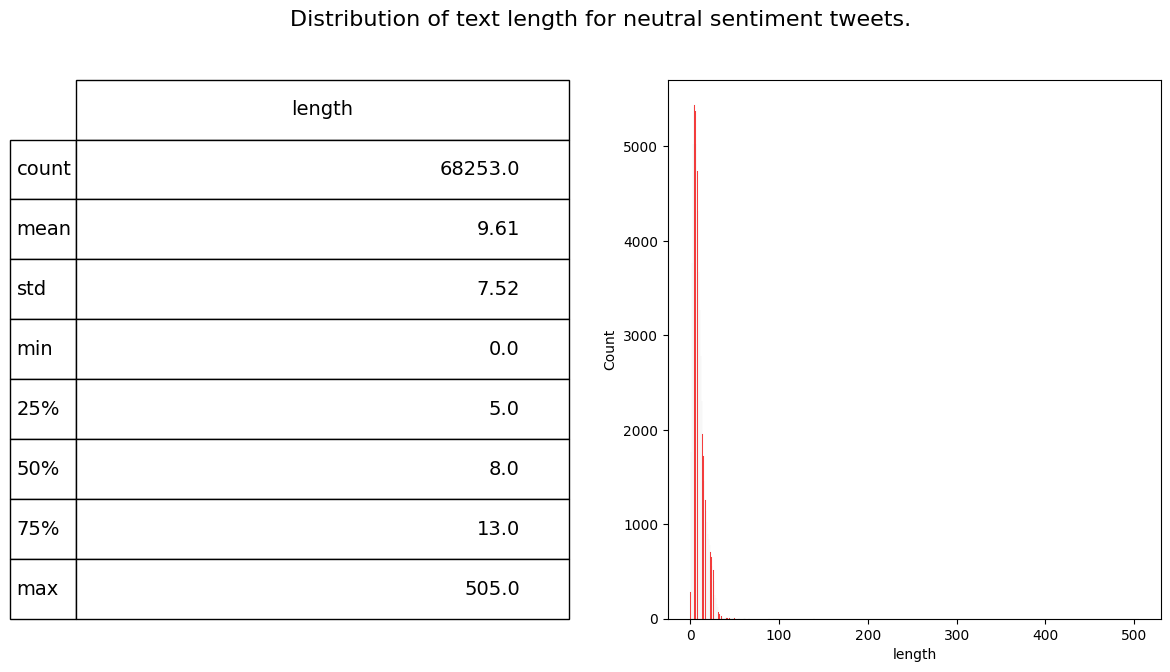

In [33]:
#Plotting the distribution of text length for Neutral sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Neutral']['length'], ax=ax1,color='red')
describe = data.length[data.label=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment tweets.', fontsize=16)

plt.show()

In [34]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [35]:
import plotly.express as px
fig = px.pie(data, names='label', title ='Pie chart of different sentiments of data')
fig.show()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labels           200118 non-null  float64
 1   messages1        200118 non-null  object 
 2   sentiment_score  200118 non-null  float64
 3   label            200118 non-null  object 
 4   length           200118 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ MB


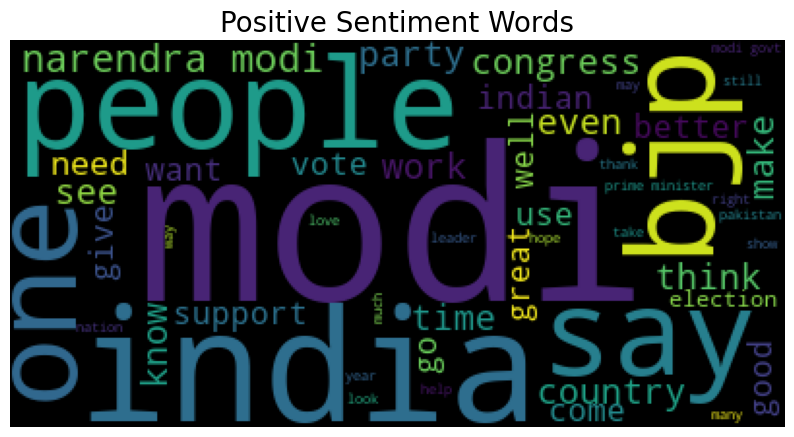

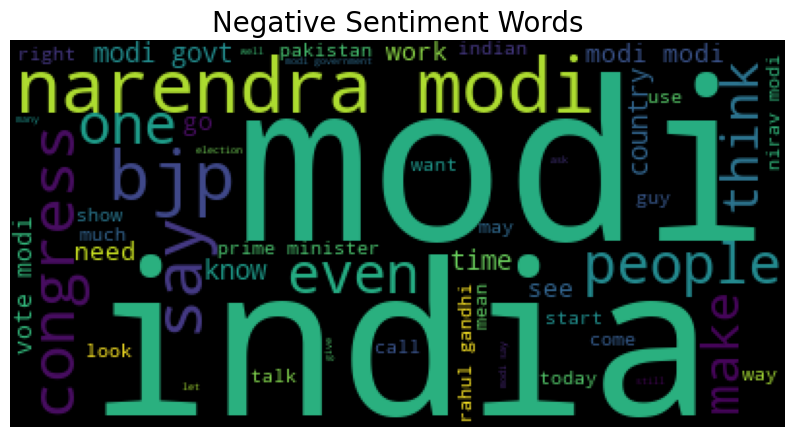

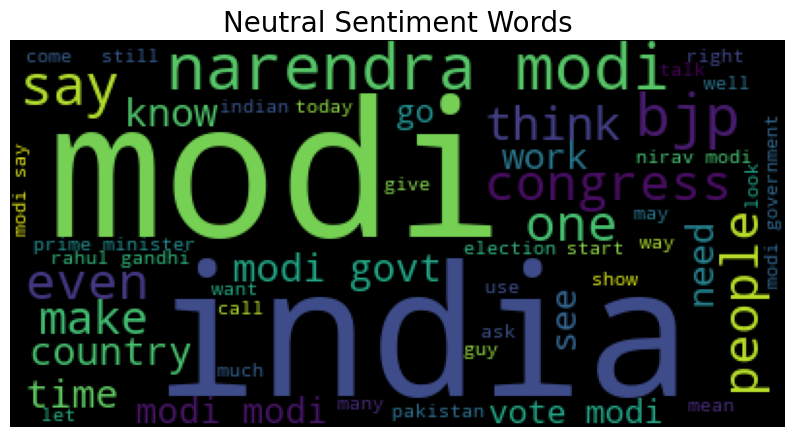

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wordcount_gen(df, category, sentiment_column='sentiment_score'):
              """
              Generating Word Cloud

              Inputs:
                - df: DataFrame containing the data
                - category: Positive/Negative/Neutral
                - sentiment_column (optional): Name of the column containing sentiment score (default: 'sentiment_score')
              """

              # Filter data based on sentiment
              filtered_data = df[df[sentiment_column] > 0.5] if category == 'Positive' else df[df[sentiment_column] <= 0.5]

              # Combine all messages from the filtered data
              combined_tweets = " ".join(filtered_data['messages1'])

              # Initialize wordcloud object
              wc = WordCloud(background_color='black',
                              max_words=50,
                              stopwords=STOPWORDS)

              # Generate and plot wordcloud
              plt.figure(figsize=(10, 10))
              plt.imshow(wc.generate(combined_tweets))
              plt.title('{} Sentiment Words'.format(category), fontsize=20)
              plt.axis('off')
              plt.show()
#Positive tweet words
wordcount_gen(data, 'Positive')

# Negative tweet words
wordcount_gen(data, 'Negative')

# Neutral tweet words (assuming sentiment_column < 0.5 is neutral)
wordcount_gen(data, 'Neutral')

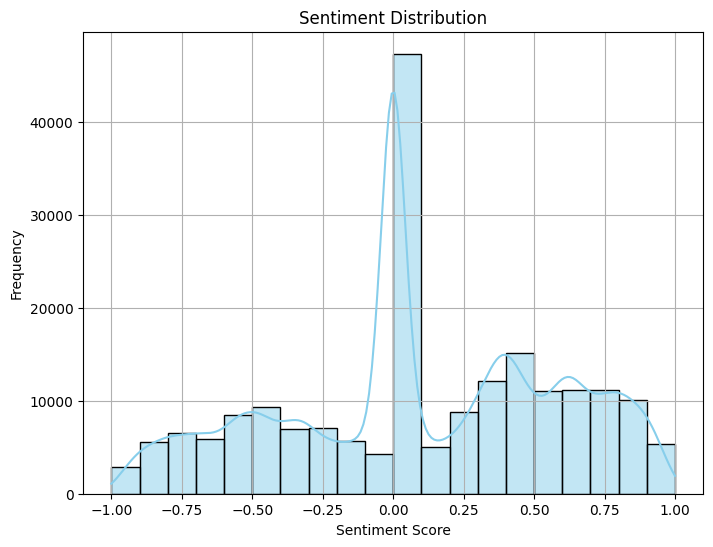

In [38]:
# Visualize sentiment distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\richa\AppData\Local\Temp\ipykernel_7976\1589436855.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




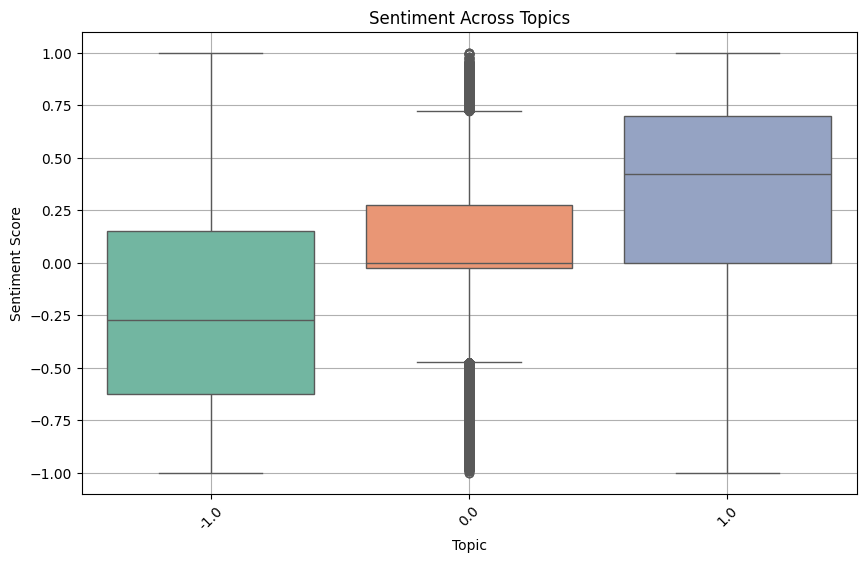

In [39]:
# Compare sentiment across labels 
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='sentiment_score', data=data, palette='Set2')
plt.title('Sentiment Across Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

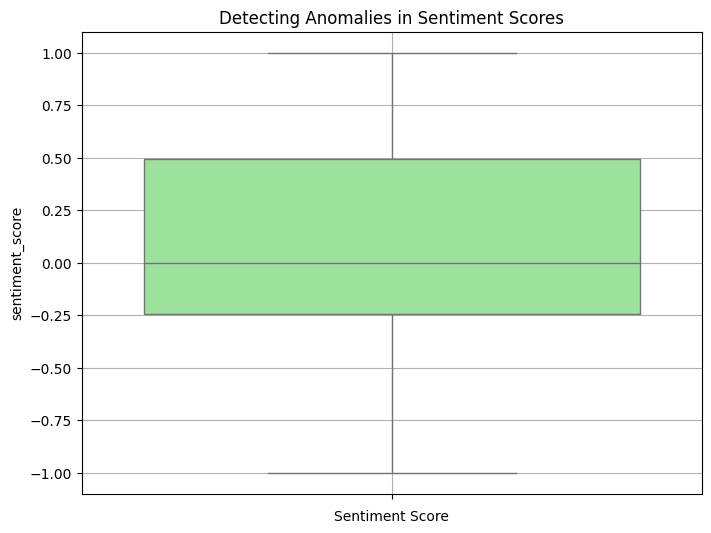

In [40]:
# Detect anomalies or outliers in sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(data['sentiment_score'], color='lightgreen')
plt.title('Detecting Anomalies in Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

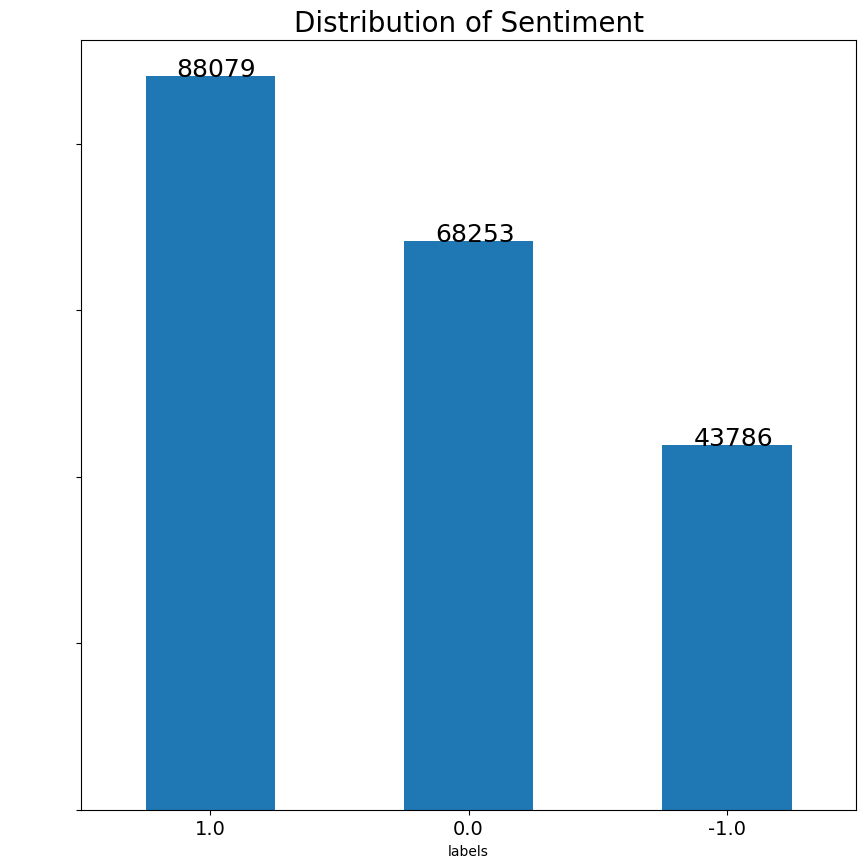

In [41]:
#Graph of Stopwords
fig , ax = plt.subplots(figsize = (10,10))
ax = data['labels'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['labels'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['labels'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['labels'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labels           200118 non-null  float64
 1   messages1        200118 non-null  object 
 2   sentiment_score  200118 non-null  float64
 3   label            200118 non-null  object 
 4   length           200118 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ MB


In [44]:
#Finding X and y
X = data['messages1']
y = data['labels']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [46]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Logistic Regression

In [47]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model on the training data
log_reg_model.fit(X_train_tfidf, y_train)

c:\Users\richa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
# Predict on the testing data
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

In [49]:
# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.8696781930841495


In [50]:
# Generate confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

Logistic Regression Confusion Matrix:
[[3224  528  536]
 [ 158 6442  247]
 [ 443  696 7738]]


In [67]:
# Generate classification report
report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Classification Report:")
print(report_log_reg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        -1.0       0.84      0.75      0.79      4288
         0.0       0.84      0.94      0.89      6847
         1.0       0.91      0.87      0.89      8877

    accuracy                           0.87     20012
   macro avg       0.86      0.85      0.86     20012
weighted avg       0.87      0.87      0.87     20012



In [1]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # Or any other model you're using

# Sample dataset (replace with your actual dataset)
texts = ["I love this!", "This is bad", "I am happy", "I hate it", "It is okay"]
labels = [1, 0, 1, 0, 2]  # Example: 1 = Positive, 0 = Negative, 2 = Neutral

# Convert text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train a model (SVM in this example)
model = LinearSVC()
model.fit(X_train, y_train)

# Save trained model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [2]:
import joblib

# Train or load your model
# Example: If using Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Sample dataset (Replace this with your actual dataset)
X = ["I love this!", "I hate this!", "It's okay."]
y = ["positive", "negative", "neutral"]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Train model
model = LogisticRegression()
model.fit(X_transformed, y)

# Save the model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
